<a href="https://colab.research.google.com/github/hyorangu/Study/blob/main/Word_Embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. 토픽 모델링 작업**

In [63]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
import matplotlib.pyplot as plt

In [64]:
# 선택한 뉴스그룹 주제들
new_categories = ['soc.religion.christian', 'rec.sport.baseball', 'comp.os.ms-windows.misc', 'sci.med',
                  'talk.politics.mideast', 'alt.atheism']

In [65]:
# 학습 데이터셋을 가져옴
newsgroups_train = fetch_20newsgroups(subset='train', categories=new_categories)

print('#Train set size:', len(newsgroups_train.data))
print('#Selected categories:', newsgroups_train.target_names)

#Train set size: 3425
#Selected categories: ['alt.atheism', 'comp.os.ms-windows.misc', 'rec.sport.baseball', 'sci.med', 'soc.religion.christian', 'talk.politics.mideast']


In [66]:
# CountVectorizer를 사용하여 단어의 빈도를 기반으로 벡터화
cv = CountVectorizer(token_pattern="[\w']{3,}", stop_words='english',
                     max_features=2000, min_df=5, max_df=0.5)
review_cv = cv.fit_transform(newsgroups_train.data)

In [67]:
# LatentDirichletAllocation을 사용하여 토픽 모델링
lda = LatentDirichletAllocation(n_components=10,  # 추출할 topic의 수
                                max_iter=5,
                                topic_word_prior=0.1, doc_topic_prior=1.0,
                                learning_method='online',
                                n_jobs=-1,  # 사용 processor 수
                                random_state=0)

review_topics = lda.fit_transform(review_cv)
print('#shape of review_topics:', review_topics.shape)
print('#Sample of review_topics:', review_topics[0])

gross_topic_weights = np.mean(review_topics, axis=0)
print('#Sum of topic weights of documents:', gross_topic_weights)

print('#shape of topic word distribution:', lda.components_.shape)

#shape of review_topics: (3425, 10)
#Sample of review_topics: [0.31009651 0.00578828 0.00498276 0.47454021 0.01621888 0.01993765
 0.07592204 0.00416537 0.08541298 0.00293533]
#Sum of topic weights of documents: [0.08023061 0.09946912 0.16531199 0.08847128 0.08503836 0.11180391
 0.08644562 0.14568289 0.11687173 0.02067447]
#shape of topic word distribution: (10, 2000)


In [68]:
# 토픽 모델링 결과 출력 함수
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d: " % topic_idx, end='')
        print(", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

print_top_words(lda, cv.get_feature_names_out(), 10)

Topic #0: god, life, hell, people, jesus, believe, bible, love, man, faith
Topic #1: com, keith, posting, msg, nntp, host, health, food, medical, caltech
Topic #2: windows, com, use, file, posting, host, university, nntp, thanks, mail
Topic #3: church, jesus, law, christian, people, book, think, christians, paul, does
Topic #4: university, science, com, michael, water, scientific, research, georgia, think, know
Topic #5: israel, turkish, israeli, jews, armenian, people, armenians, war, armenia, government
Topic #6: said, people, know, don't, just, like, didn't, time, going, i'm
Topic #7: com, year, pitt, good, baseball, game, team, gordon, banks, better
Topic #8: people, don't, think, does, believe, say, true, just, god, question
Topic #9: 'ax, max, g9v, b8f, a86, 145, 1d9, 34u, 75u, 2di



n_components: 6, perplexity: 354.220
n_components: 7, perplexity: 344.778
n_components: 8, perplexity: 345.852
n_components: 9, perplexity: 338.311
n_components: 10, perplexity: 330.533
n_components: 11, perplexity: 330.494
n_components: 12, perplexity: 338.060
n_components: 13, perplexity: 326.570
n_components: 14, perplexity: 327.823
n_components: 15, perplexity: 328.854


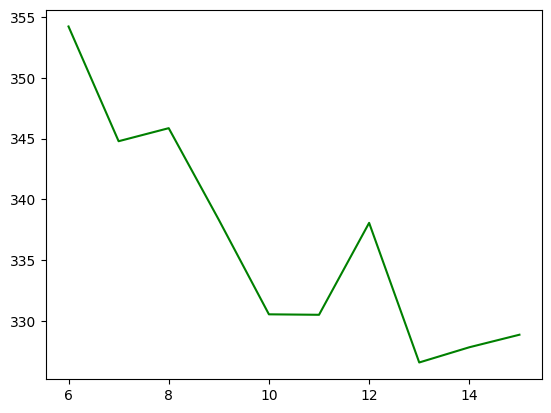

n_components with minimum perplexity: 13


In [69]:
# perplexity를 시각화하여 최적의 토픽 수 찾기
def show_perplexity(cv, start=10, end=30, max_iter=5, topic_word_prior=0.1,
                    doc_topic_prior=1.0):
    iter_num = []
    per_value = []

    for i in range(start, end + 1):
        lda = LatentDirichletAllocation(n_components=i, max_iter=max_iter,
                                        topic_word_prior=topic_word_prior,
                                        doc_topic_prior=doc_topic_prior,
                                        learning_method='batch', n_jobs=-1,
                                        random_state=7)
        lda.fit(cv)
        iter_num.append(i)
        pv = lda.perplexity(cv)
        per_value.append(pv)
        print(f'n_components: {i}, perplexity: {pv:0.3f}')

    plt.plot(iter_num, per_value, 'g-')
    plt.show()
    return start + per_value.index(min(per_value))

print("n_components with minimum perplexity:",
      show_perplexity(review_cv, start=6, end=15))

n_components: 6, perplexity: 354.220
n_components: 7, perplexity: 344.778
n_components: 8, perplexity: 345.852
n_components: 9, perplexity: 338.311
n_components: 10, perplexity: 330.533
n_components: 11, perplexity: 330.494
n_components: 12, perplexity: 338.060
n_components: 13, perplexity: 326.570
n_components: 14, perplexity: 327.823
n_components: 15, perplexity: 328.854


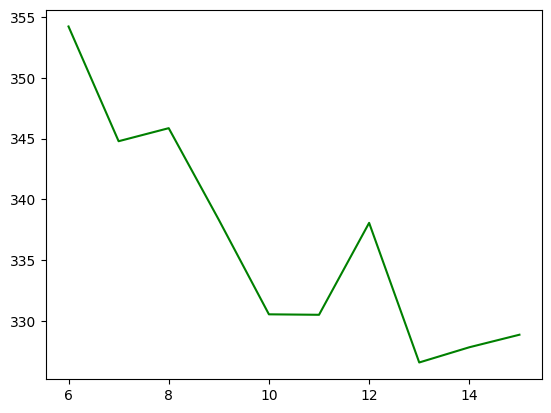

Topic #0: said, people, know, don't, didn't, just, going, say, like, time
Topic #1: information, 1993, new, research, health, university, number, medical, use, water
Topic #2: msg, like, people, food, good, don't, it's, i'm, just, com
Topic #3: israel, jews, israeli, jewish, arab, war, people, peace, state, arabs
Topic #4: year, good, game, team, baseball, better, games, runs, think, players
Topic #5: com, islam, jim, islamic, robert, netcom, ibm, princeton, just, net
Topic #6: think, don't, god, people, believe, does, say, atheists, evidence, true
Topic #7: turkish, armenian, armenians, armenia, turkey, people, turks, genocide, serdar, argic
Topic #8: windows, file, use, files, dos, using, version, problem, access, card
Topic #9: god, jesus, bible, church, christian, people, christians, christ, hell, does
Topic #10: pitt, gordon, banks, michael, geb, uiuc, reply, computer, science, university
Topic #11: posting, host, nntp, university, distribution, mail, usa, thanks, reply, news
Topi

In [70]:
# 최적의 토픽 수로 모델을 다시 학습하고 결과 출력
optimal_topics = show_perplexity(review_cv, start=6, end=15)
lda = LatentDirichletAllocation(n_components=optimal_topics,
                                max_iter=20,
                                topic_word_prior=0.1,
                                doc_topic_prior=1.0,
                                learning_method='batch',
                                n_jobs=-1,
                                random_state=7)

review_topics = lda.fit_transform(review_cv)

print_top_words(lda, cv.get_feature_names_out(), 10)

# 2. word2vec을 사용해서 유사한 단어군들 **찾아보기**

In [71]:
!pip install nltk

import pandas as pd
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

In [72]:
data_path = '/content/drive/MyDrive/학교 실습 파일/Womens Clothing E-Commerce Reviews.csv'

In [73]:
# Women's E-Commerce Clothing Reviews 데이터셋 로드
df = pd.read_csv(data_path)

In [74]:
# 데이터셋 일부 확인
print(df.head())

   Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1       

In [75]:
# NULL 값 존재 유무 확인
print(df.isnull().values.any())

True


In [76]:
# NULL 값 제거
df = df.dropna(subset=['Review Text'])
print(df.isnull().values.any())

True


In [77]:
# NLTK를 사용하여 불용어 정의
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [78]:
# NLTK를 사용하여 토큰화
import nltk
nltk.download('punkt')

tokenized_data = []
for sentence in tqdm(df['Review Text']):
    words = word_tokenize(sentence)  # 영어 토큰화
    words = [word.lower() for word in words if word.isalpha()]  # 영어 단어만 선택
    words = [word for word in words if word not in stop_words]  # 불용어 제거
    tokenized_data.append(words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
100%|██████████| 22641/22641 [00:40<00:00, 563.49it/s]


리뷰의 최대 길이: 58
리뷰의 평균 길이: 27.61786140188154


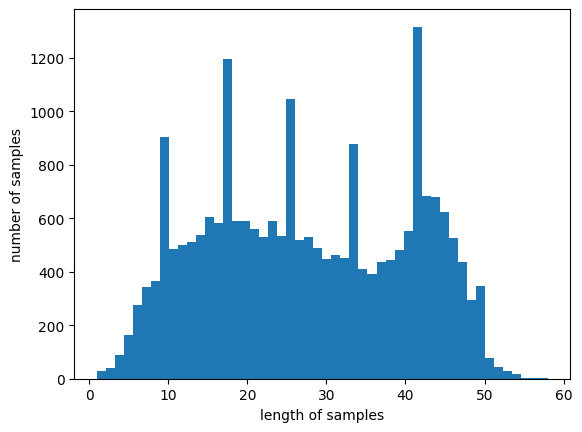

In [79]:
# 리뷰 길이 분포 확인
print('리뷰의 최대 길이:', max(len(review) for review in tokenized_data))
print('리뷰의 평균 길이:', sum(map(len, tokenized_data)) / len(tokenized_data))
plt.hist([len(review) for review in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [80]:
# Word2Vec 모델 학습
model = Word2Vec(sentences=tokenized_data, vector_size=100, window=5, min_count=5, workers=4, sg=0)


In [81]:
# 학습된 모델 활용
print(model.wv.most_similar("great"))
print(model.wv.most_similar("movie"))

[('fantastic', 0.7862590551376343), ('good', 0.785386860370636), ('nice', 0.7363545298576355), ('awesome', 0.7340114712715149), ('amazing', 0.7319842576980591), ('fabulous', 0.7272597551345825), ('perfect', 0.6975669264793396), ('wonderful', 0.6552652716636658), ('excellent', 0.6543987393379211), ('bill', 0.6374205350875854)]
[('buyer', 0.9677931070327759), ('activities', 0.9673190116882324), ('admittedly', 0.9668598771095276), ('panties', 0.9667820930480957), ('words', 0.9657604098320007), ('chair', 0.9651291966438293), ('dollars', 0.9632911086082458), ('skip', 0.9619457721710205), ('ups', 0.9617055654525757), ('upset', 0.9610630869865417)]


# 3. **Doc2Vec**

In [82]:
!pip install konlpy

import pandas as pd
from konlpy.tag import Mecab
from gensim.models.doc2vec import TaggedDocument
from tqdm import tqdm

In [83]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [84]:
df = pd.read_csv('/content/drive/MyDrive/학교 실습 파일/Womens Clothing E-Commerce Reviews.csv',  sep=',')
df = df.dropna()
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [85]:
#mecab = Mecab()
from konlpy.tag import Okt
okt = Okt()

tagged_corpus_list = []

for index, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Review Text']
    tag = row['Class Name']
    tagged_corpus_list.append(TaggedDocument(tags=[tag], words=okt.morphs(text)))

print('문서의 수 :', len(tagged_corpus_list))

100%|██████████| 19662/19662 [02:31<00:00, 129.75it/s]

문서의 수 : 19662


In [86]:
tagged_corpus_list[0]

TaggedDocument(words=['I', 'had', 'such', 'high', 'hopes', 'for', 'this', 'dress', 'and', 'really', 'wanted', 'it', 'to', 'work', 'for', 'me', '.', 'i', 'initially', 'ordered', 'the', 'petite', 'small', '(', 'my', 'usual', 'size', ')', 'but', 'i', 'found', 'this', 'to', 'be', 'outrageously', 'small', '.', 'so', 'small', 'in', 'fact', 'that', 'i', 'could', 'not', 'zip', 'it', 'up', '!', 'i', 'reordered', 'it', 'in', 'petite', 'medium', ',', 'which', 'was', 'just', 'ok', '.', 'overall', ',', 'the', 'top', 'half', 'was', 'comfortable', 'and', 'fit', 'nicely', ',', 'but', 'the', 'bottom', 'half', 'had', 'a', 'very', 'tight', 'under', 'layer', 'and', 'several', 'somewhat', 'cheap', '(', 'net', ')', 'over', 'layers', '.', 'imo', ',', 'a', 'major', 'design', 'flaw', 'was', 'the', 'net', 'over', 'layer', 'sewn', 'directly', 'into', 'the', 'zipper', '-', 'it', 'c'], tags=['Dresses'])

In [87]:
from gensim.models import doc2vec

In [88]:
model = doc2vec.Doc2Vec(vector_size=300, alpha=0.025, min_alpha=0.025, workers=8, window=8)

# Vocabulary 빌드
model.build_vocab(tagged_corpus_list)
#print(f"Tag Size: {len(model.docvecs.doctags.keys())}", end=' / ')

# Doc2Vec 학습
model.train(tagged_corpus_list, total_examples=model.corpus_count, epochs=50)

# 모델 저장
model.save('WomensClothingReviews.doc2vec')

In [93]:
similar_doc = model.dv.most_similar('Dresses')
print(similar_doc)

[('Chemises', 0.5255148410797119), ('Skirts', 0.43104711174964905), ('Blouses', 0.3686714768409729), ('Lounge', 0.34798261523246765), ('Fine gauge', 0.33964139223098755), ('Trend', 0.33227163553237915), ('Sweaters', 0.3243301212787628), ('Swim', 0.3171188533306122), ('Knits', 0.31583237648010254), ('Jackets', 0.3053090572357178)]


In [94]:
similar_doc = model.dv.most_similar('Pants')
print(similar_doc)

[('Jeans', 0.5152004361152649), ('Lounge', 0.4690096974372864), ('Shorts', 0.4669322967529297), ('Casual bottoms', 0.46367740631103516), ('Legwear', 0.3908075988292694), ('Chemises', 0.35606521368026733), ('Sleep', 0.35602545738220215), ('Swim', 0.31128019094467163), ('Blouses', 0.2971009612083435), ('Knits', 0.272469162940979)]


In [95]:
similar_doc = model.dv.most_similar('Blouses')
print(similar_doc)

[('Knits', 0.6314436793327332), ('Chemises', 0.5048619508743286), ('Casual bottoms', 0.4302922189235687), ('Fine gauge', 0.4158622920513153), ('Dresses', 0.3686714470386505), ('Skirts', 0.3680531978607178), ('Layering', 0.36412617564201355), ('Jackets', 0.36115866899490356), ('Sweaters', 0.3577306270599365), ('Swim', 0.3487706482410431)]


In [96]:
similar_doc = model.dv.most_similar('Knits')
print(similar_doc)

[('Blouses', 0.6314436793327332), ('Chemises', 0.4939593970775604), ('Fine gauge', 0.48034778237342834), ('Sweaters', 0.4700234830379486), ('Casual bottoms', 0.46615996956825256), ('Layering', 0.43191173672676086), ('Jackets', 0.3868440091609955), ('Lounge', 0.38242125511169434), ('Swim', 0.36263757944107056), ('Intimates', 0.3310200870037079)]
